In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df=pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
df_cor=df.corr()

In [8]:
df_cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [9]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<AxesSubplot:>

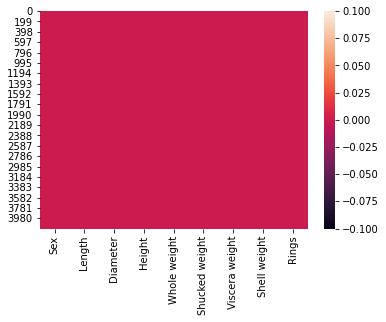

In [13]:
sns.heatmap(df.isnull())

<AxesSubplot:>

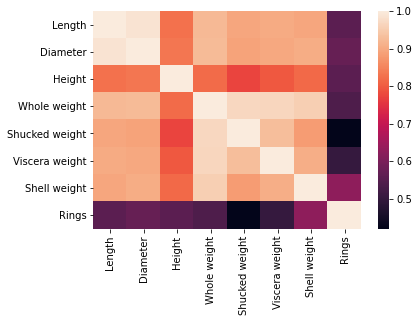

In [14]:
sns.heatmap(df_cor)

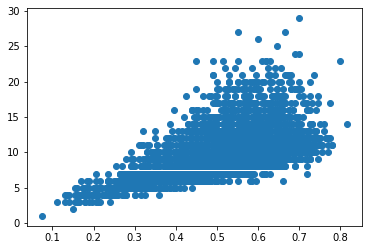

In [15]:
plt.scatter(df['Length'],df['Rings'])

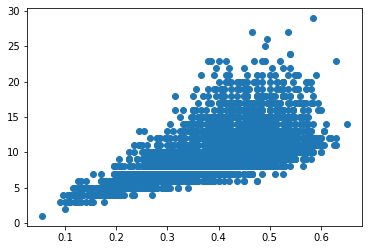

In [16]:
plt.scatter(df['Diameter'],df['Rings'])

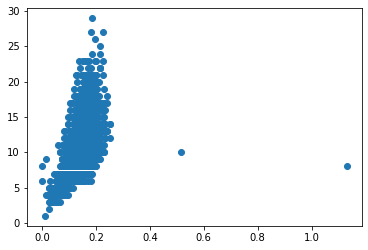

In [17]:
plt.scatter(df['Height'],df['Rings'])

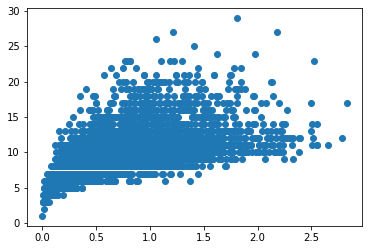

In [18]:
plt.scatter(df['Whole weight'],df['Rings'])

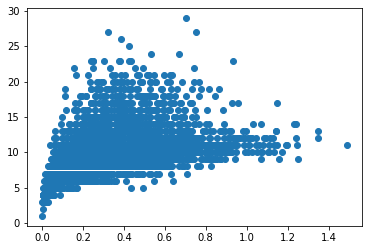

In [19]:
plt.scatter(df['Shucked weight'],df['Rings'])

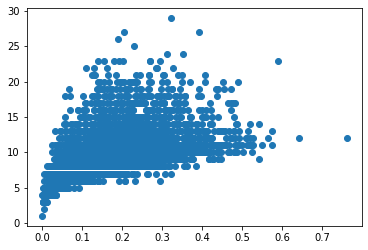

In [20]:
plt.scatter(df['Viscera weight'],df['Rings'])

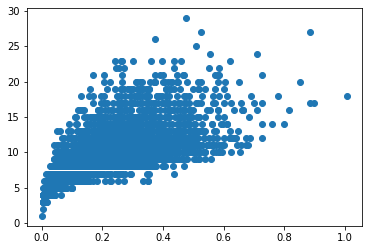

In [21]:
plt.scatter(df['Shell weight'],df['Rings'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

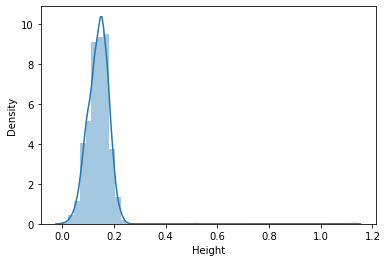

In [22]:
sns.distplot(df['Height'])

In [23]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:xlabel='Length', ylabel='Density'>

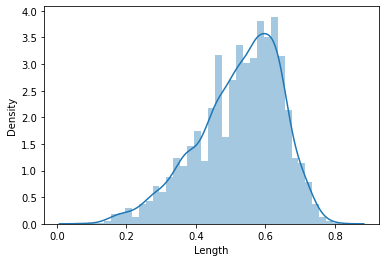

In [24]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

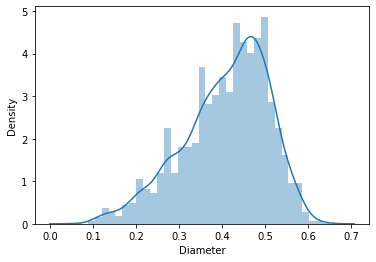

In [25]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

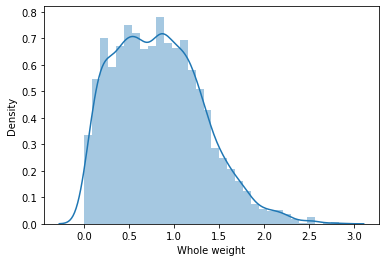

In [26]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

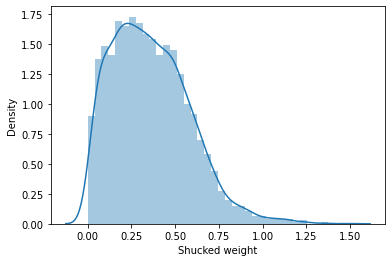

In [27]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

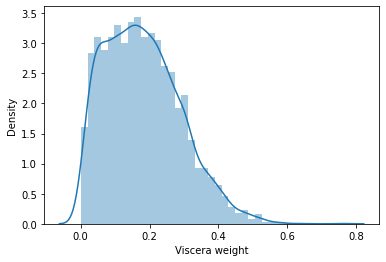

In [28]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

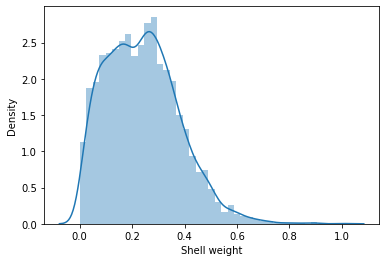

In [29]:
sns.distplot(df['Shell weight'])

In [30]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [31]:
df['Length']=np.log1p(df['Length'])

In [32]:
df['Diameter']=np.log1p(df['Diameter'])

In [33]:
df['Height']=np.log1p(df['Height'])

In [34]:
df['Whole weight']=np.log1p(df['Whole weight'])

In [35]:
df['Shucked weight']=np.log1p(df['Shucked weight'])

In [36]:
df['Viscera weight']=np.log1p(df['Viscera weight'])

In [37]:
df['Shell weight']=np.log1p(df['Shell weight'])

In [38]:
df.skew()

Length           -0.851674
Diameter         -0.787167
Height            1.099602
Whole weight     -0.038066
Shucked weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
Rings             1.114102
dtype: float64

In [39]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df['Sex']=lc.fit_transform(df['Sex'])

In [40]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.375006,0.311154,0.090754,0.414755,0.202533,0.096219,0.139762,15
1,2,0.300105,0.235072,0.086178,0.203349,0.094856,0.047361,0.067659,7
2,0,0.425268,0.350657,0.126633,0.517006,0.228330,0.132343,0.190620,9
3,2,0.364643,0.311154,0.117783,0.416075,0.195156,0.107957,0.144100,10
4,1,0.285179,0.227136,0.076961,0.186480,0.085719,0.038740,0.053541,7


<AxesSubplot:>

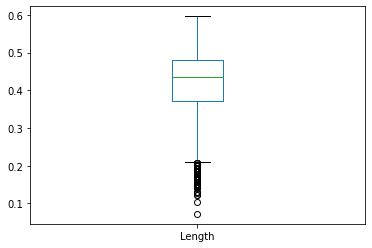

In [41]:
df['Length'].plot.box()

<AxesSubplot:>

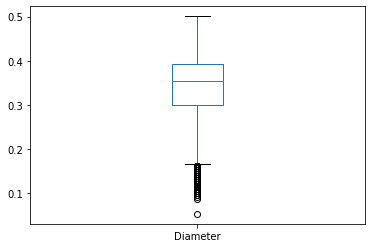

In [42]:
df['Diameter'].plot.box()

<AxesSubplot:>

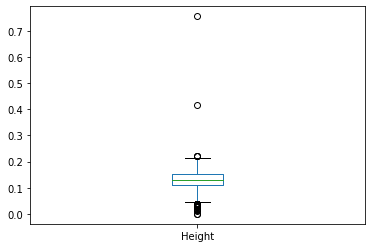

In [43]:
df['Height'].plot.box()

<AxesSubplot:>

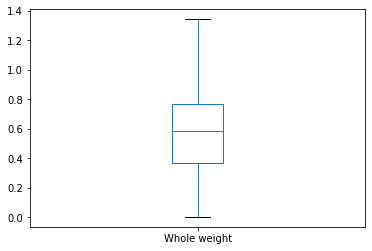

In [44]:
df['Whole weight'].plot.box()

<AxesSubplot:>

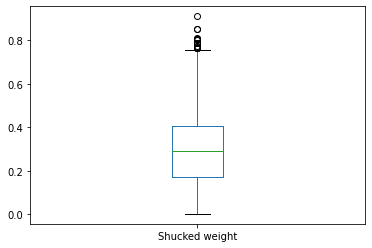

In [45]:
df['Shucked weight'].plot.box()

<AxesSubplot:>

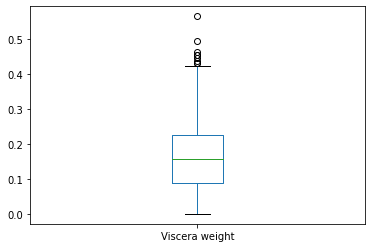

In [46]:
df['Viscera weight'].plot.box()

<AxesSubplot:>

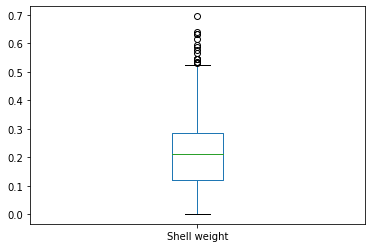

In [47]:
df['Shell weight'].plot.box()

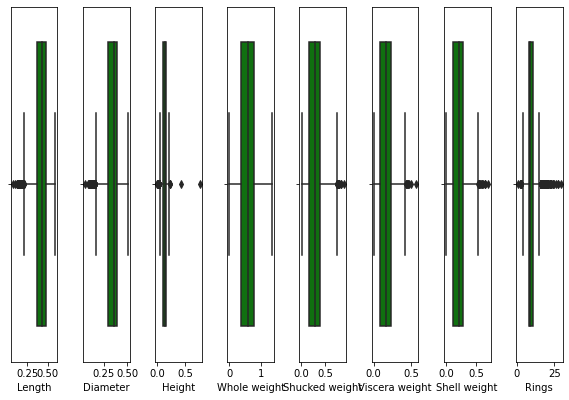

In [48]:
collist=df.columns.values
ncol=22
nrows=20
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([   6,   72,   83,  129,  148,  149,  163,  164,  165,  166,  166,
        167,  168,  181,  232,  236,  236,  236,  237,  237,  238,  238,
        239,  239,  270,  275,  278,  294,  306,  306,  310,  313,  314,
        351,  355,  362,  375,  416,  417,  428,  431,  433,  465,  465,
        469,  478,  480,  501,  525,  525,  526,  526,  530,  572,  628,
        673,  674,  675,  678,  694,  694,  694,  696,  696,  718,  718,
        719,  719,  720,  720,  744,  754,  756,  811,  891,  898, 1053,
       1174, 1204, 1207, 1209, 1210, 1257, 1417, 1422, 1427, 1428, 1429,
       1429, 1528, 1762, 1763, 1763, 1824, 1986, 1987, 1987, 2051, 2108,
       2108, 2114, 2114, 2115, 2157, 2161, 2169, 2169, 2169, 2176, 2180,
       2199, 2201, 2209, 2275, 2305, 2334, 2334, 2335, 2343, 2343, 2344,
       2358, 2371, 2371, 2380, 2381, 2381, 2436, 2459, 2471, 2811, 2862,
       3007, 3008, 3140, 3141, 3149, 3151, 3151, 3193, 3280, 3318, 3318,
       3359, 3427, 3472, 3472, 3599, 3600, 3600, 3

In [50]:
z[6][8]

3.12251641377204

In [51]:
z[3996][3]

3.6503743928687036

In [52]:
df_new=df[(z<3).all(axis=1)]

In [53]:
df_new.shape

(4048, 9)

In [54]:
df.shape

(4177, 9)

In [55]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [56]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.375006,0.311154,0.090754,0.414755,0.202533,0.096219,0.139762
1,2,0.300105,0.235072,0.086178,0.203349,0.094856,0.047361,0.067659
2,0,0.425268,0.350657,0.126633,0.517006,0.228330,0.132343,0.190620
3,2,0.364643,0.311154,0.117783,0.416075,0.195156,0.107957,0.144100
4,1,0.285179,0.227136,0.076961,0.186480,0.085719,0.038740,0.053541
...,...,...,...,...,...,...,...,...
4172,0,0.447886,0.371564,0.152721,0.634988,0.314811,0.214305,0.222343
4173,2,0.463734,0.364643,0.126633,0.676001,0.363948,0.194332,0.231508
4174,2,0.470004,0.388658,0.186480,0.777488,0.422322,0.252702,0.268499
4175,0,0.485508,0.395415,0.139762,0.739315,0.425921,0.231905,0.259283


In [57]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4048, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

def model_score(m):
    max_i=0
    max_score=0
    for i in range(0,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
        m.fit(x_train,y_train)
        pred=m.predict(x_test)
        acc=accuracy_score(y_test,pred)
        if(acc>max_score):
            max_score=acc
            max_i=i
    print(m)
    print("maxscore:",max_score)
    print("i=",i)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [59]:
kn=KNeighborsClassifier()
sv=SVC()
dt=DecisionTreeClassifier()
mn=MultinomialNB()
rf=RandomForestClassifier(n_estimators=100)

list=[kn,sv,dt,mn,rf]

for val in list:
    model_score(val)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
maxscore: 0.2625514403292181
i= 199
[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3 10  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 15 10  3  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 10 26 25  4  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  9 30 42 28 15  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  1 17 33 63 38 25  9  2  1  1  0  0  0  0  0]
 [ 0  0  3  4 22 37 59 37 20  4  1  2  0  2  0  0  0]
 [ 0  0  0  3  6 34 57 44 23  7  5  1  1  2  0  1  0]
 [ 0  0  0  0  3 20 31 36 29  7  4  3  1  0  0  0  0]
 [ 0  0  0  2  4  6 22 22 12  8  4  3  2  1  0  0  0]
 [ 0  0  0  1  2  7 13 12 18  6  5  1  1  0  1  0  0]
 [ 0  0  0  0  0  3  7  7  5  4  6  1  0  0  1  1  0]
 [ 0  0  0  0  0  3  3  6  8  1  1  0  2  1  1  1  0]
 [ 0  0  0  0  0  0  4  7  1  1  2  2  1  1  0  0  0]
 [ 0  0  0  0  0  1  

# Cross validation

In [72]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.15897436 0.22945205 0.21134021 0.18998273 0.24783362 0.20418848
 0.19014085]
0.2045588996752576 0.0268242680983696


In [73]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(kn,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.17777778 0.25856164 0.28522337 0.20725389 0.23570191 0.2530541
 0.25352113]
0.23872768710229053 0.0331532655206638


In [74]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(sv,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.18461538 0.24657534 0.26116838 0.20379965 0.25823224 0.23211169
 0.24295775]
0.2327800630804538 0.026478433072594537


In [75]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mn,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.15555556 0.16609589 0.18556701 0.16925734 0.16291161 0.17452007
 0.1778169 ]
0.17024633993130903 0.009243707072762692


In [76]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.17948718 0.28253425 0.27319588 0.23834197 0.27902946 0.2617801
 0.26408451]
0.2540647636793851 0.03331385642360419


# saving the model

In [78]:
import joblib
joblib.dump(kn,"knmodel.obj")

['knmodel.obj']

In [84]:
knfile=joblib.load("knmodel.obj")
